#  FoodHub Data Analysis

In [46]:
#import libraries for data manipulation
import pandas as pd
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the structure of the data

In [47]:
df= pd.read_csv("foodhub_order.csv")
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [48]:
#returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Observations:
- The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [49]:
# check the shape of the datase
df.shape

(1898, 9)

### Observations:
 - The DataFrame has 1898 rows and 9 columns.

In [50]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observations:
 - There are a total of 1898 non-null observations in each of the columns.
 - The dataset contains 9 columns: 4 are of integer type ('order_id', 'customer_id', 'food_preparation_time', 'delivery_time'), 1 is of floating point type ('cost_of_the_order') and 4 are of the general object type ('restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating').
 - Total memory usage is approximately 133.6 KB.

In [51]:
# checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### Observations:
 - There are no missing values in the data.

In [52]:
# get the summary statistics of the numerical data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### Observations:
 - Order ID and Customer ID are just identifiers for each order.
 - The cost of an order ranges from 4.47 to 35.41 dollars, with an average order costing around 16 dollars and a standard deviation of 7.5 dollars. The cost of 75% of the orders are below 23 dollars. This indicates that most of the customers prefer low-cost food compared to the expensive ones.
 - Food preparation time ranges from 20 to 35 minutes, with an average of around 27 minutes and a standard deviation of 4.6 minutes. The spread is not very high for the food preparation time.
 -  Delivery time ranges from 15 to 33 minutes, with an average of around 24 minutes and a standard deviation of 5 minutes. The spread is not too high for delivery time either.

In [53]:
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Observations:
 - There are 736 orders that are not rated.

## Exploratory Data Analysis (EDA)

In [54]:
# check unique order id 
df["order_id"].nunique()

1898

### Observations: 
 - There are 1898 unique orders. As mentioned earlier, 'order_id' is just an identifier for the orders.

In [55]:
# check unique customer id
df["customer_id"].nunique()

1200

### Observations:
 - There are 1200 unique customers. As 'customer_id' is a variable to identify customers, and the number of unique customer IDs is less than the number of unique order IDs, we can see that there are some customers who have placed more than one order.

In [56]:
# check unique restaurant name
df['restaurant_name'].nunique()


178

### Observations:
 - There are 178 unique restaurants in the dataset.
 - Let's check the number of orders that get served by the restaurants.

In [57]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

### Observations:
 - The restaurant that has received maximum number of orders is Shake Shack.

In [58]:

# check unique cuisine type
df["cuisine_type"].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

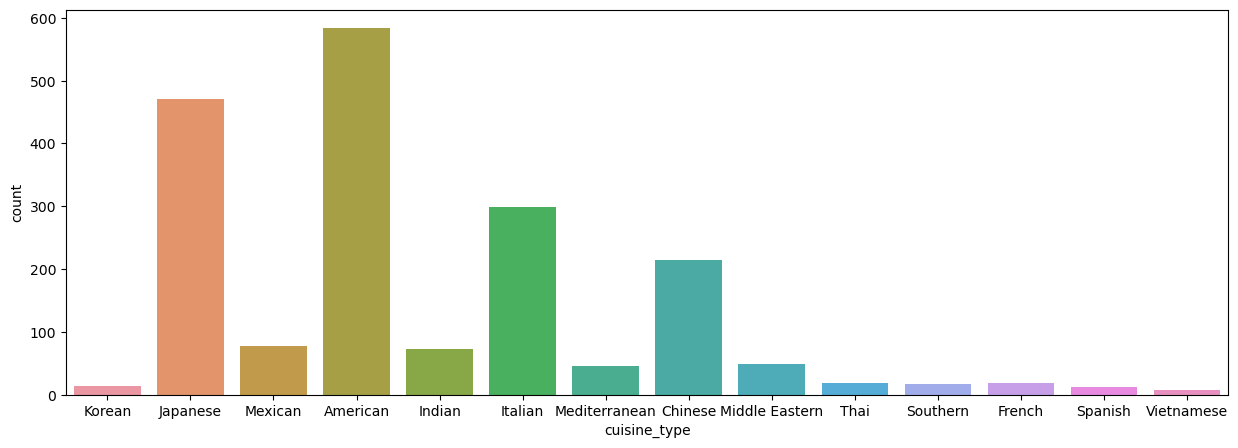

In [59]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = "cuisine_type")


### Observations:
 - There are 14 unique cuisines in the dataset.
 - The distribution of cuisine types show that cuisine types are not equally distributed.
 - The most frequent cuisine type is American followed by Japanese and Italian.
 - Vietnamese appears to be the least popular of all the cuisines.

C:\Users\SYS8\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


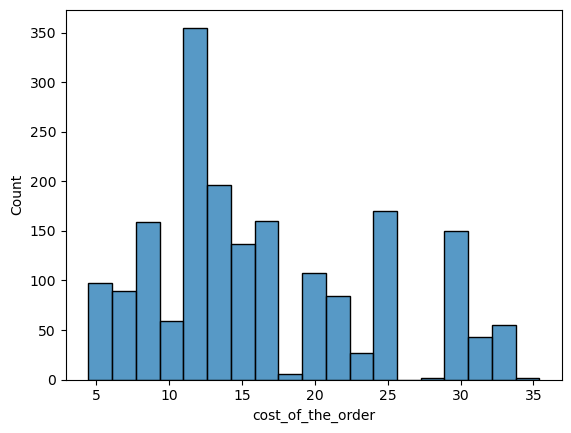

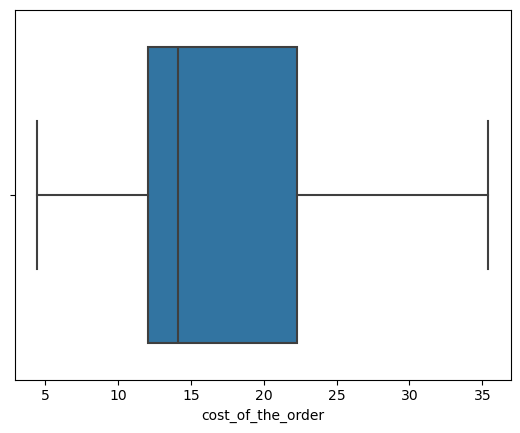

In [60]:
sns.histplot(data= df, x = "cost_of_the_order")
plt.show()
sns.boxplot(data = df ,x = "cost_of_the_order" )
plt.show()

### Observations:
 - The average cost of the order is greater than the median cost indicating that the distribution for the cost of the order is right-skewed.
 - The mode of the distribution indicates that a large chunk of people prefer to order food that costs around 10-12 dollars.
 - There are few orders that cost greater than 30 dollars. These orders might be for some expensive meals.

In [61]:
# check the unique values
df["day_of_the_week"].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

<Axes: xlabel='day_of_the_week', ylabel='count'>

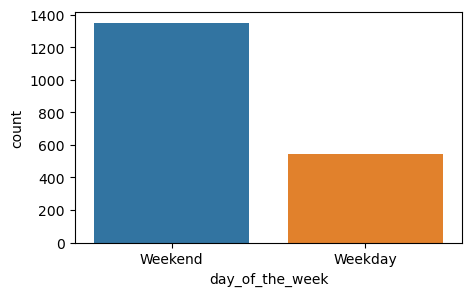

In [62]:
plt.figure(figsize=(5,3))
sns.countplot(data = df ,x = "day_of_the_week")

### Observations:
  - The 'day_of_the_week' columns consists of 2 unique values - Weekday and Weekend
  - The distribution shows that number of order placed on weekends is approximately double the number of orders placed on weekdays.

## Rating

In [63]:
# check the unique values
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

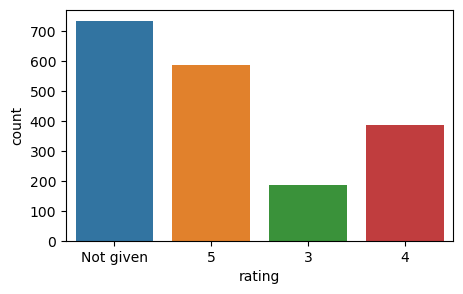

In [64]:
plt.figure(figsize=(5,3))
sns.countplot(data = df , x = "rating")

### Observations:
 - The distribution of 'rating' shows that the most frequent rating category is 'not given', followed by a rating of 5.
 - only around 200 orders have been rated 3.

## Food Preparation time

C:\Users\SYS8\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


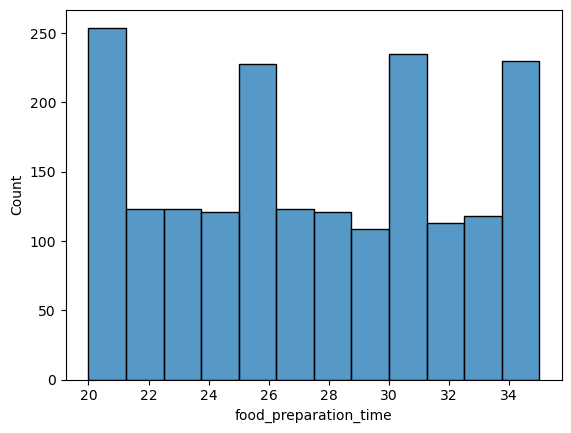

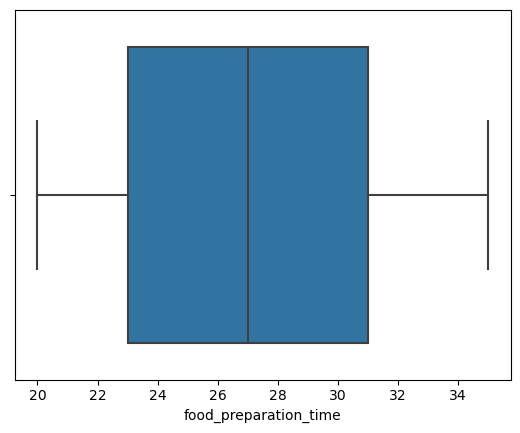

In [65]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

### Observations:
 - The average food preparation time is almost equal to the median food preparation time indicating that the distribution is nearly symmetrical.
 - The food preparation time is pretty evenly distributed between 20 and 35 minutes.
 - There are no outliers in this column.

## Delivery time


C:\Users\SYS8\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


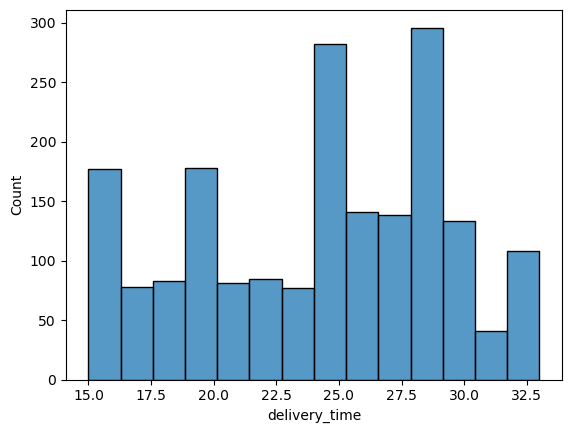

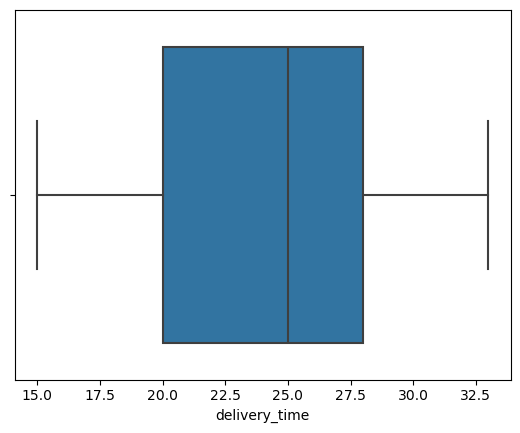

In [66]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### Observations:
 - The average delivery time is a bit smaller than the median delivery time indicating that the distribution is a bit left-skewed.
 - Comparatively more number of orders have delivery time between 24 and 30 minutes.
 - There are no outliers in this column.

In [67]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()[0:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### Observations:
 - Top 5 popular restaurants that have received the highest number of orders 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'.
 - Almost 33% of the orders in the dataset are from these restaurants.

In [68]:
# Get most popular cuisine on weekends
df_weekend = df[df["day_of_the_week"]=="Weekend"]
df_weekend ["cuisine_type"].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### Observations:
 - The most popular cuisine type on weekends is American.

In [69]:
# Get orders that cost above 20 dollars

df_greater_than_20 = df[df ['cost_of_the_order'] > 20]

#calculate the number of total orders where the cost is above 20 dollars

print("The number of total orders that cost above 20 dollars is:",df_greater_than_20.shape[0])

# calculate percentage of such orders in the dataset

percentage = (df_greater_than_20 .shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage,2),'%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### Observations:
 - There are a total of 555 orders that cost above 20 dollars.
 - The percentage of such orders in the dataset is around 29.24%.

In [70]:
# get the mean delivery time 
print ("The mean delivery time for this dataset is",round(df["delivery_time"].mean(),2),"minutes")

The mean delivery time for this dataset is 24.16 minutes


### Observations:
 - The mean delivery time is around 24.16 minutes.

In [71]:
# Get the counts of  each customer_id
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

### Observations:
 - Customer with ID 52832 has ordered 13 times.

### Cuisine vs Cost of the order

<function matplotlib.pyplot.show(close=None, block=None)>

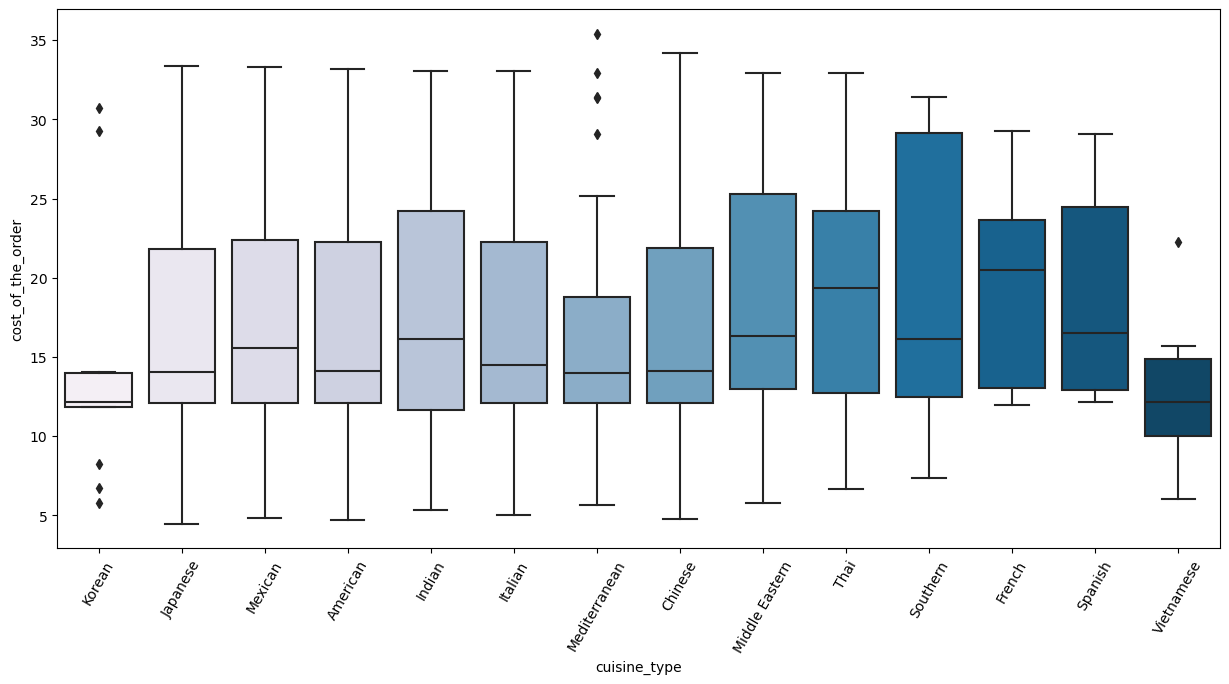

In [72]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize = (15,7))
sns.boxplot(data = df , x = "cuisine_type" , y = "cost_of_the_order",palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show

### Observations:
 - Vietnamese and Korean cuisines cost less compared to other cuisines.
 - The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
 - Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
 - French and Spanish cuisines are costlier compared to other cuisines.

### Cuisine vs Food Preparation time¶

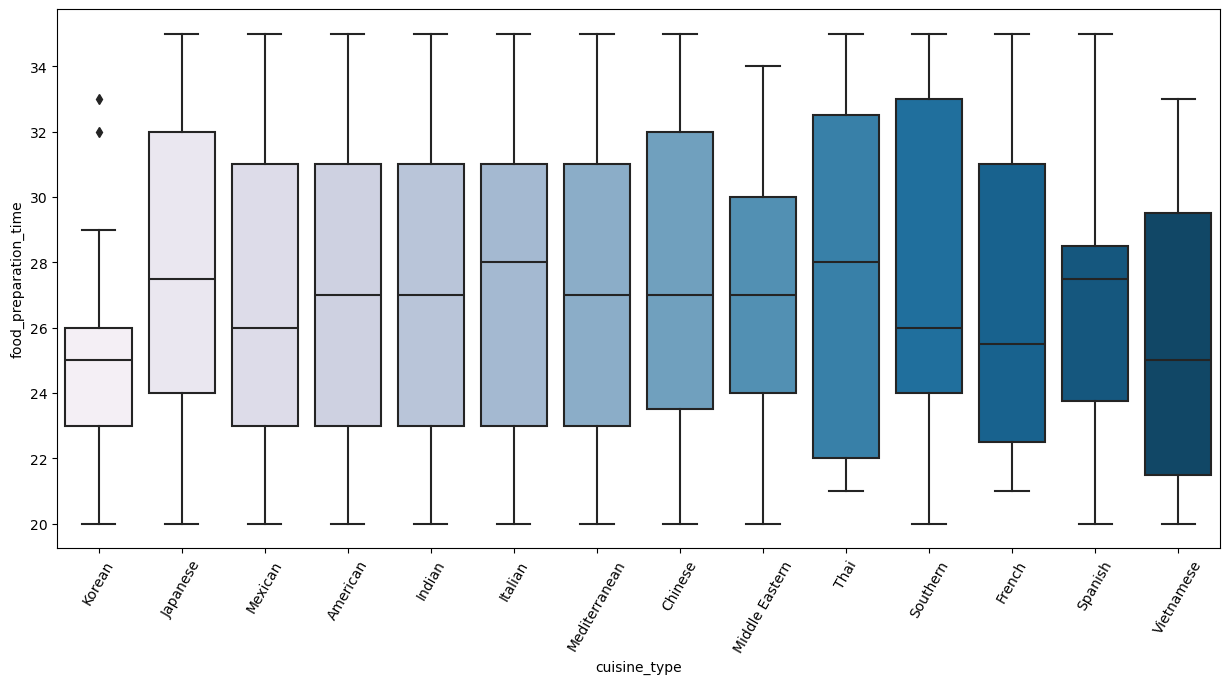

In [73]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time",  palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

### Observations:
 - Food preparation time is very consistent for most of the cuisines.
 - The median food preparation time lies between 24 and 30 minutes for all the cuisines.
 - Outliers are present for the food preparation time of Korean cuisine.
 - Korean cuisine takes less time compared to the other cuisines.

### Day of the Week vs Delivery time

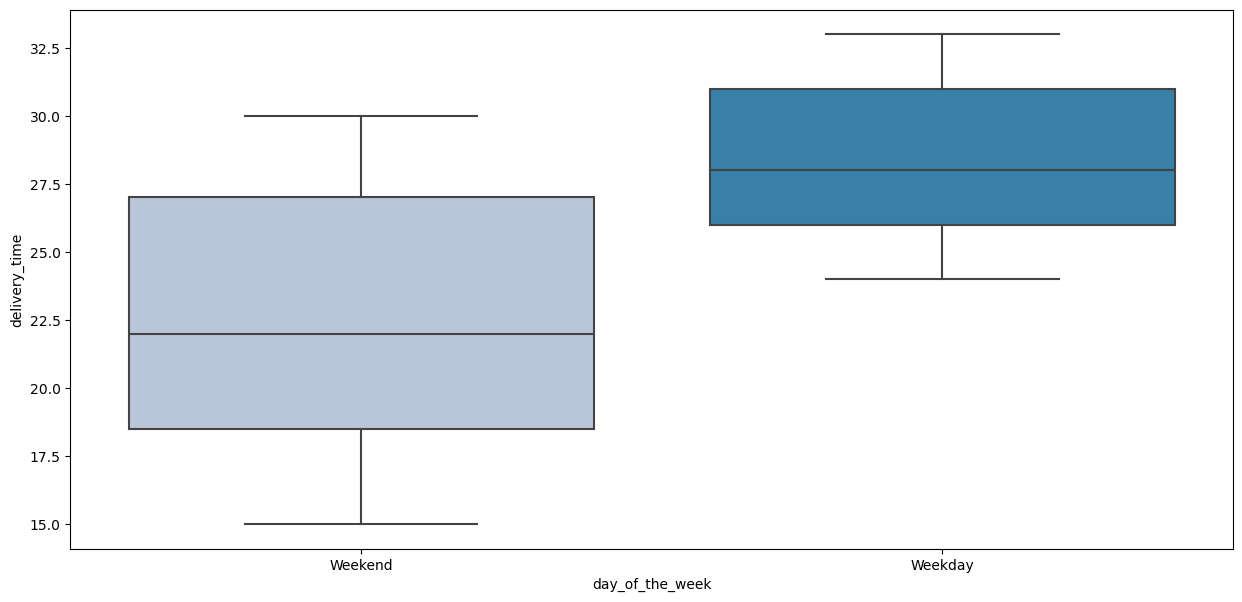

In [74]:
# Relationship between day of the week and delivery time

plt.figure(figsize=(15,7))
sns.boxplot( data = df ,x = "day_of_the_week", y = "delivery_time",palette = 'PuBu')
plt.show()

### Observations:
 - The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to the dip in traffic over the weekends.

### Revenue generated by the restaurants

In [75]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

### Observations:
 - The above 15 restaurants are generating more than 500 dollars revenue.

### Rating vs Delivery time

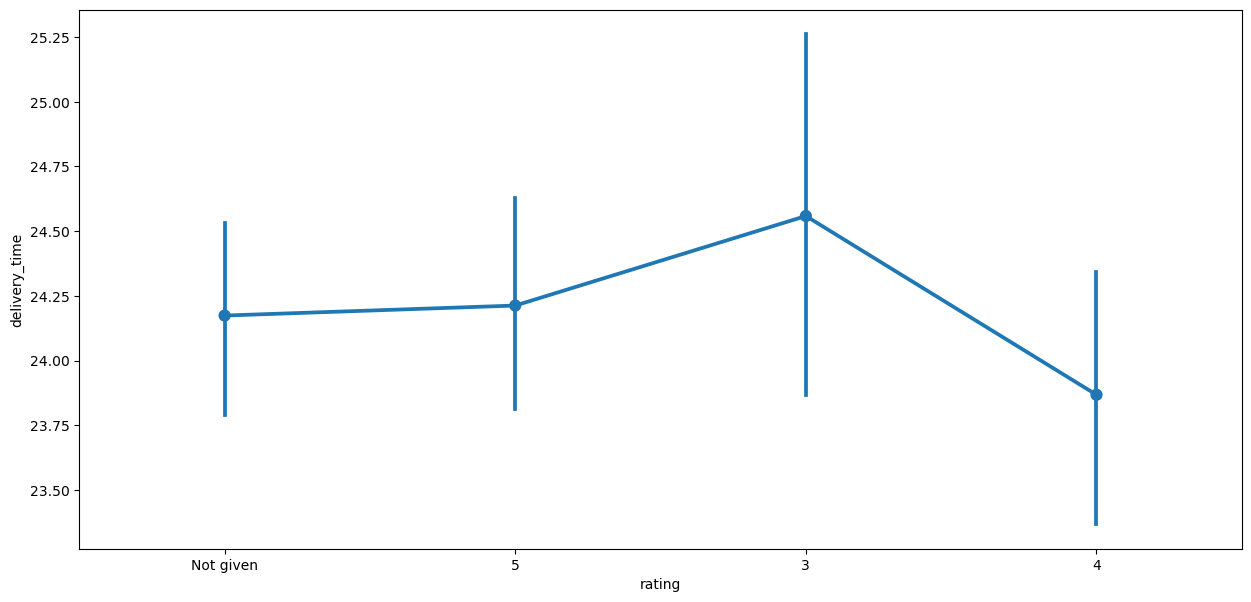

In [76]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot( data = df , x = 'rating', y = 'delivery_time')
plt.show()

### Observations:
 - It is possible that delivery time plays a role in the low-rating of the orders.

### Rating vs Food preparation time


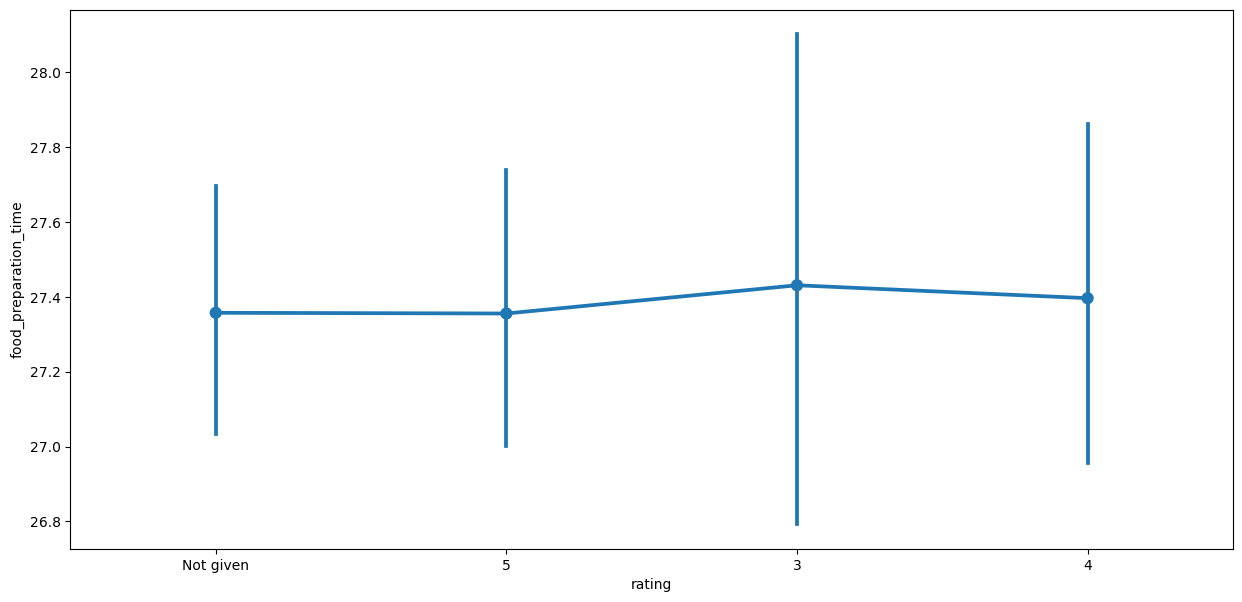

In [77]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df , x = 'rating', y = 'food_preparation_time')
plt.show()

### Observations:
 - It seems that food preparation time does not play a role in the low-rating of the orders

### Rating vs Cost of the order

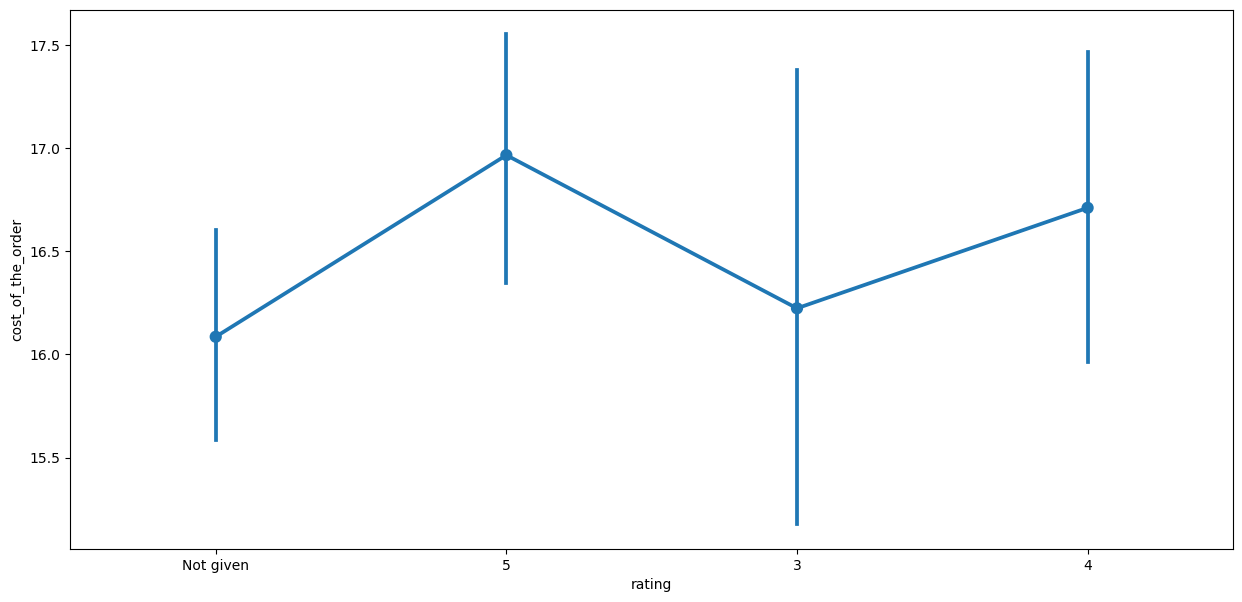

In [78]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot( data = df ,x = 'rating', y = 'cost_of_the_order')
plt.show()

### Observations:
 - It seems that high-cost orders have been rated well and low-cost orders have not been rated.

### Correlation among variables

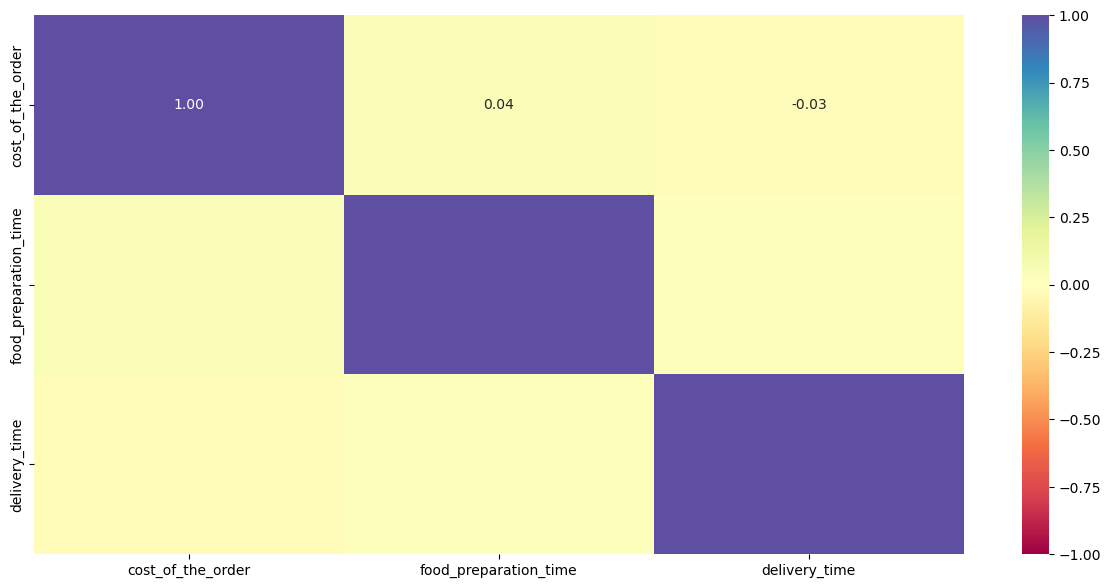

In [79]:
# plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations:
 - There is no correlation between cost of the order, delivery time and food preparation time.

In [80]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [81]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### Observations:
 - The restaurants fulfilling the criteria to get the promotional offer are: 'The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack' and 'Blue Ribbon Sushi'.

In [85]:
#function to determine the net revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [86]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev,2),"dollars")

The net revenue is around 6166.3 dollars


### Observations:
 - he net revenue generated on all the orders given in the dataset is around 6166.3 dollars.

In [87]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


### Observations:
 - Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time

In [88]:
# get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Observations:
 - The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.
 - This could be due to the dip of traffic volume in the weekends.

### Conclusions:
 - Around 80% of the orders are for American, Japanese, Italian and Chinese cuisines. Thus, it seems that these cuisines are quite popular among customers of FoodHub.
 - Shake Shack is the most popular restaurant that has received the highest number of orders.
 - Order volumes increase on the weekends compared to the weekdays.
 - Delivery time over the weekends is less compared to the weekdays. This could be due to the dip in traffic volume over the weekends.
 - Around 39% of the orders have not been rated.